In [1]:
from nb_utils import set_path
set_path()

In [137]:
from klarna_challenge.config import *
from klarna_challenge import utils
from klarna_challenge.data import load_data, clean_data
import pandas as pd

In [142]:
data = load_data()
data = clean_data(data)

In [111]:
data.shape

(99976, 28)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   uuid                             99976 non-null  string  
 1   default                          89976 non-null  category
 2   account_amount_added_12_24m      99976 non-null  int64   
 3   age                              99976 non-null  int64   
 4   merchant_category                99976 non-null  category
 5   merchant_group                   99976 non-null  category
 6   has_paid                         99976 non-null  bool    
 7   max_paid_inv_0_12m               99976 non-null  float64 
 8   max_paid_inv_0_24m               99976 non-null  float64 
 9   name_in_email                    99976 non-null  category
 10  num_active_inv                   99976 non-null  int64   
 11  num_arch_dc_0_12m                99976 non-null  int64   
 12  num_

In [25]:
sorted(data.merchant_category.unique())

['Adult Shoes & Clothing',
 'Automotive Parts & Accessories',
 'Bags & Wallets',
 'Body & Hair Care',
 'Books & Magazines',
 'Car electronics',
 'Children Clothes & Nurturing products',
 'Children toys',
 'Cleaning & Sanitary',
 'Collectibles',
 'Concept stores & Miscellaneous',
 'Cosmetics',
 'Costumes & Party supplies',
 'Dating services',
 'Decoration & Art',
 'Dietary supplements',
 'Digital services',
 'Diversified Health & Beauty products',
 'Diversified Home & Garden products',
 'Diversified Jewelry & Accessories',
 'Diversified children products',
 'Diversified electronics',
 'Diversified entertainment',
 'Diversified erotic material',
 'Education',
 'Electronic equipment & Related accessories',
 'Erotic Clothing & Accessories',
 'Event tickets',
 'Food & Beverage',
 'Fragrances',
 'Furniture',
 'General Shoes & Clothing',
 'Hobby articles',
 'Household electronics (whitegoods/appliances)',
 'Jewelry & Watches',
 'Kitchenware',
 'Music & Movies',
 'Musical Instruments & Equipme

In [30]:
data.merchant_group.unique()

array(['Health & Beauty', 'Entertainment', 'Electronics',
       'Leisure, Sport & Hobby', 'Clothing & Shoes', 'Children Products',
       'Home & Garden', 'Jewelry & Accessories', 'Intangible products',
       'Automotive Products', 'Erotic Materials', 'Food & Beverage'],
      dtype=object)

In [34]:
data.name_in_email.unique()

array(['no_match', 'F+L', 'L1+F', 'F1+L', 'F', 'Nick', 'L', 'Initials'],
      dtype=object)

In [92]:
data.isna().mean().sort_values(ascending=False)

avg_payment_span_0_12m              0.238417
num_active_div_by_paid_inv_0_12m    0.229445
num_arch_written_off_12_24m         0.180823
num_arch_written_off_0_12m          0.180823
account_days_in_dc_12_24m           0.118388
account_days_in_rem_12_24m          0.118388
account_days_in_term_12_24m         0.118388
default                             0.100024
status_3rd_last_archived_0_24m      0.000000
num_unpaid_bills                    0.000000
status_last_archived_0_24m          0.000000
status_2nd_last_archived_0_24m      0.000000
uuid                                0.000000
status_max_archived_0_6_months      0.000000
status_max_archived_0_12_months     0.000000
recovery_debt                       0.000000
sum_capital_paid_account_0_12m      0.000000
sum_capital_paid_account_12_24m     0.000000
sum_paid_inv_0_12m                  0.000000
status_max_archived_0_24_months     0.000000
num_arch_dc_12_24m                  0.000000
num_arch_rem_0_12m                  0.000000
num_arch_o

In [93]:
data.loc[:, data.isna().any()].describe()

,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,avg_payment_span_0_12m,num_active_div_by_paid_inv_0_12m,num_arch_written_off_0_12m,num_arch_written_off_12_24m
count,88140.000000,88140.000000,88140.000000,76140.000000,77037.000000,81898.000000,81898.000000
mean,0.223043,5.044622,0.286896,17.971473,0.114840,0.000122,0.000159
std,5.808117,22.863971,2.929910,12.751066,0.293483,0.011049,0.014407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10.800000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,14.909091,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,21.000000,0.100000,0.000000,0.000000
max,365.000000,365.000000,97.000000,260.000000,9.000000,1.000000,2.000000


In [109]:
data.columns[data.isna().any()].drop("default")

Index(['account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'num_active_div_by_paid_inv_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'worst_status_active_inv'],
      dtype='object')

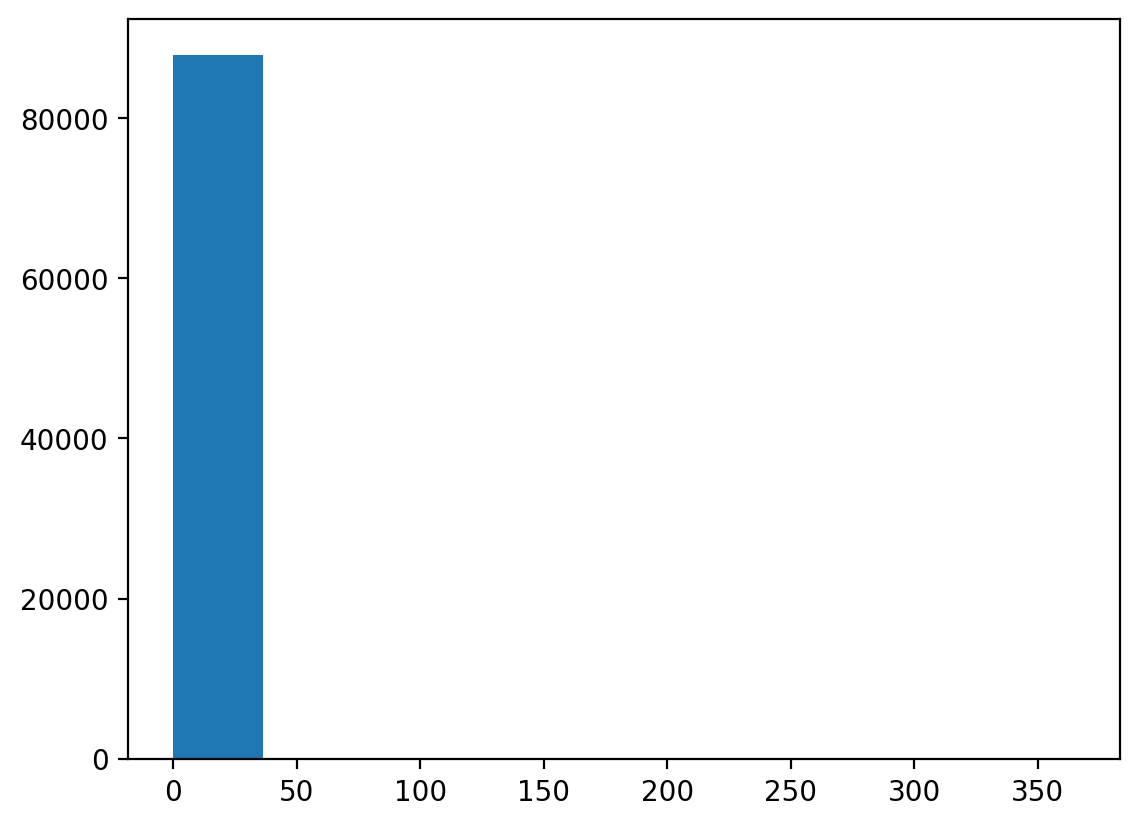

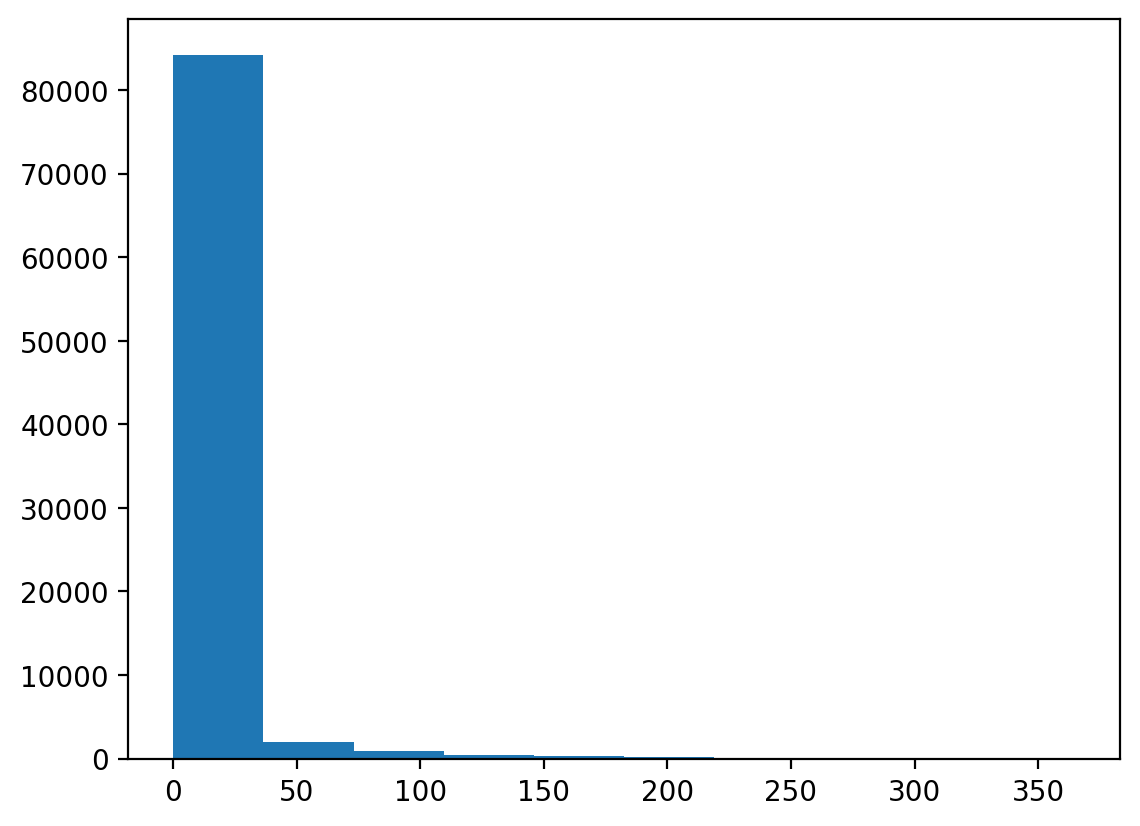

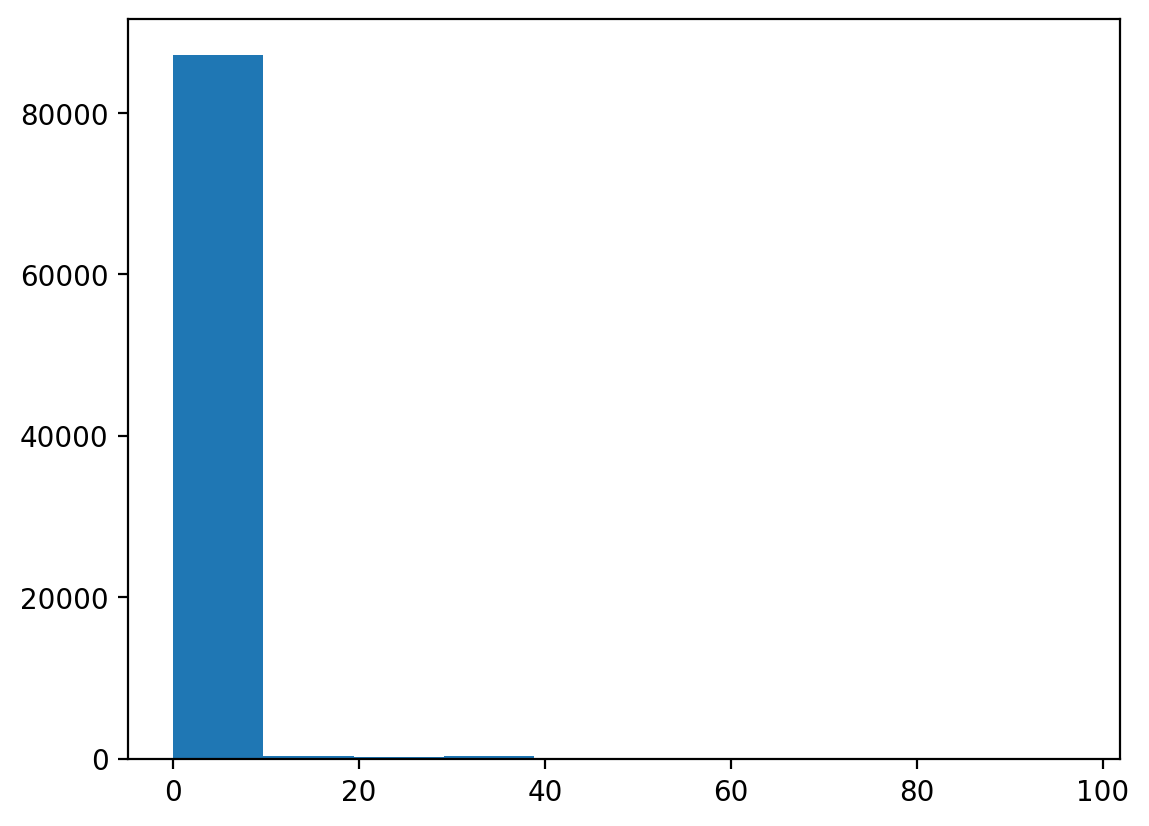

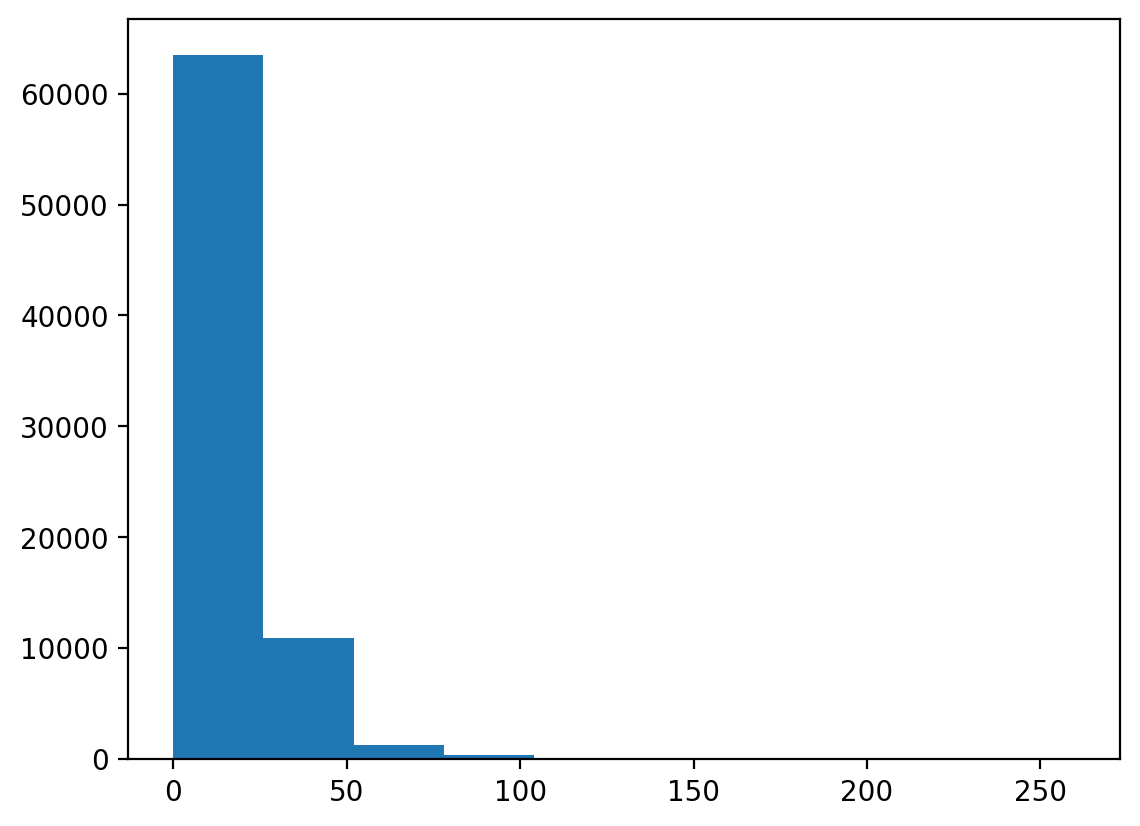

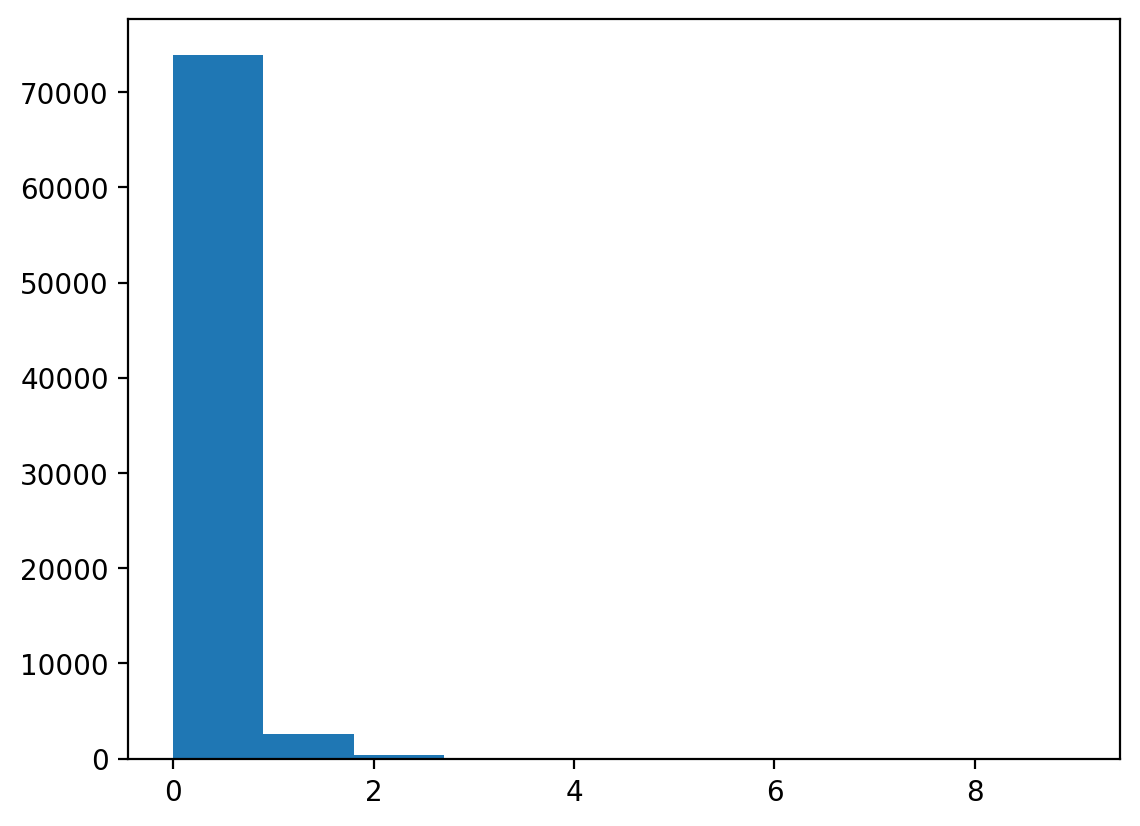

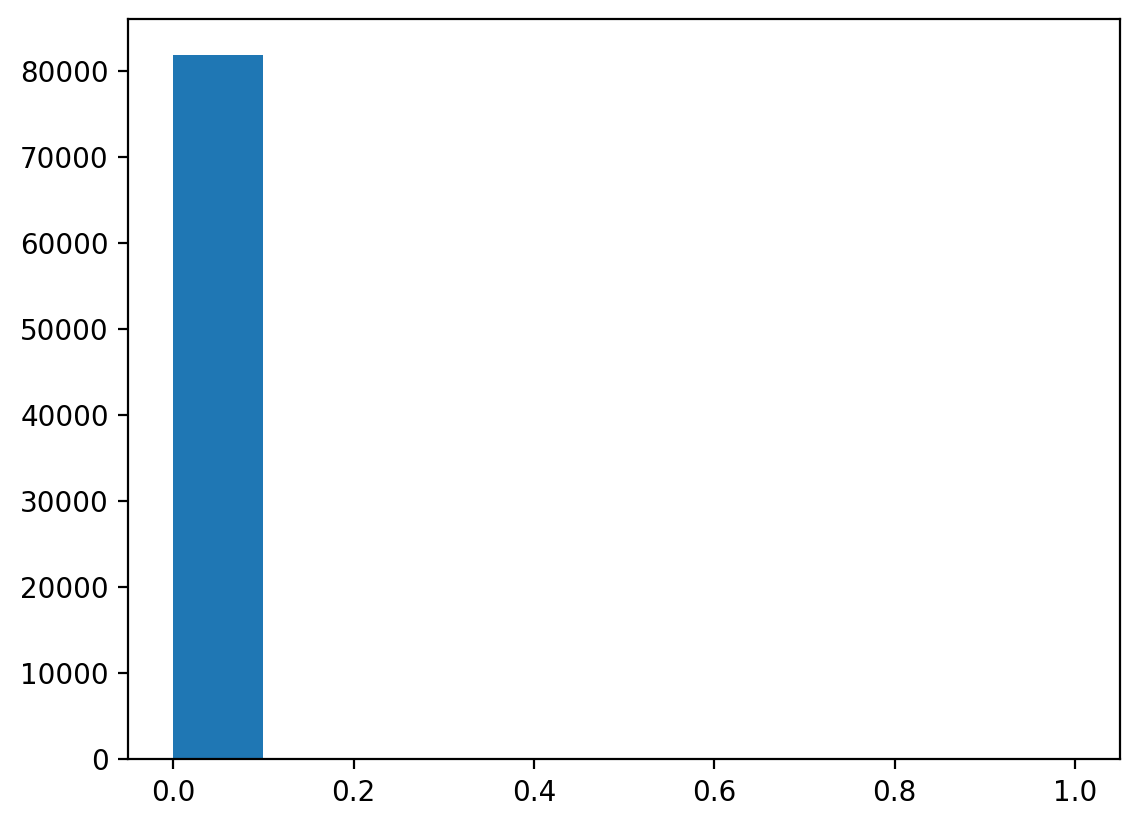

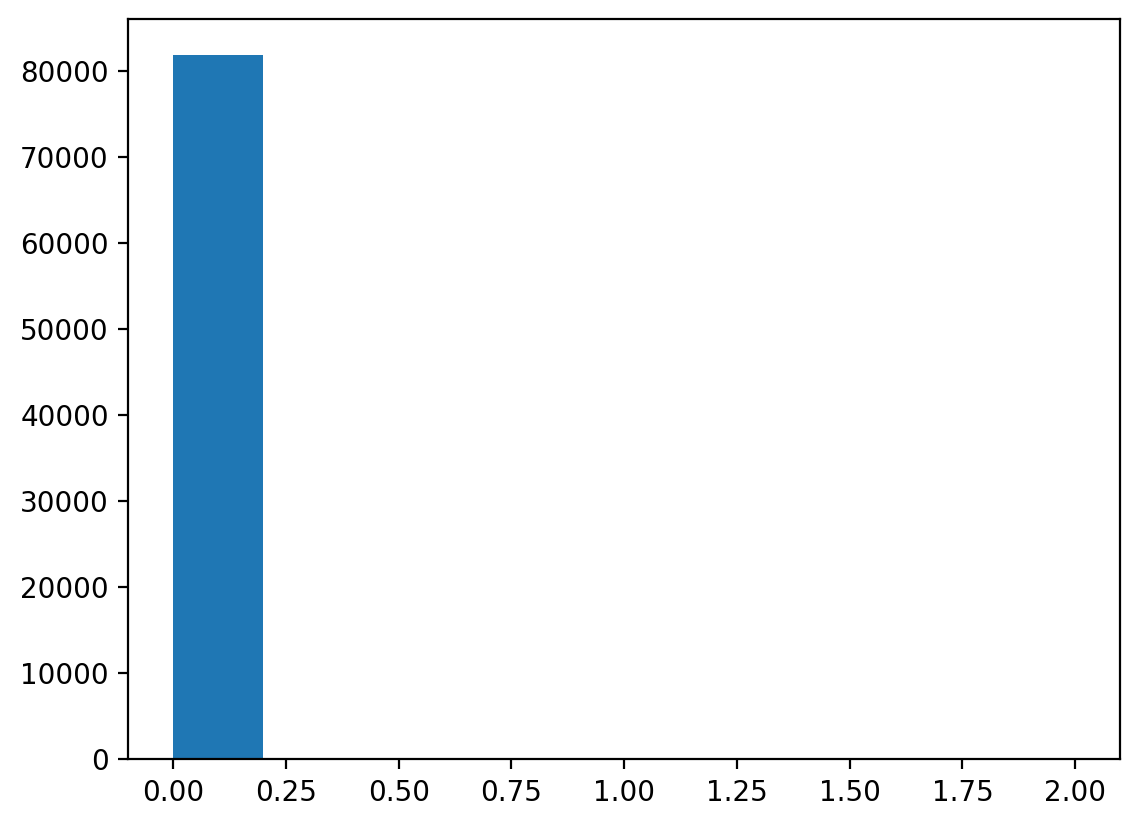

In [101]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
%matplotlib inline
plt.style.use("default")

for col in data.loc[:, data.isna().any()].drop(columns="default").columns:
    plt.hist(data[col])
    plt.show()

In [113]:
data

,uuid,default,account_amount_added_12_24m,age,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,...,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,20,Dietary supplements,Health & Beauty,True,31638.0,31638.0,no_match,...,1,1,1,1,1,0,0,0,178839,9.653333
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,50,Books & Magazines,Entertainment,True,13749.0,13749.0,F+L,...,1,1,1,2,2,0,0,0,49014,13.181389
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,22,Diversified entertainment,Entertainment,True,29890.0,29890.0,L1+F,...,1,1,1,2,2,0,0,0,124839,11.561944
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,36,Diversified entertainment,Entertainment,True,40040.0,40040.0,F1+L,...,1,1,1,1,1,0,0,0,324676,15.751111
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,25,Electronic equipment & Related accessories,Electronics,True,7100.0,7100.0,F+L,...,0,0,1,1,1,0,0,0,7100,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,NaN,0,33,Electronic equipment & Related accessories,Electronics,True,35195.0,35195.0,F1+L,...,1,1,1,1,1,0,0,0,60127,10.765556
99972,f8db22f4-9819-420c-abbc-9ddf1843176e,NaN,0,44,Body & Hair Care,Health & Beauty,True,4740.0,4740.0,F1+L,...,1,1,0,1,1,0,7948,0,4740,21.708333
99973,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,NaN,45671,24,Jewelry & Watches,Jewelry & Accessories,True,1200.0,1200.0,Nick,...,0,0,0,0,0,0,17447,19627,3100,2.185278
99974,bafcab15-9898-479c-b729-c9dda7edb78f,NaN,56102,31,Decoration & Art,Home & Garden,True,15000.0,15000.0,Nick,...,1,1,1,1,1,0,18339,56180,34785,9.725278


In [114]:
data.describe()

,account_amount_added_12_24m,age,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,num_unpaid_bills,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours
count,9.997600e+04,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,9.997600e+04,99976.000000
mean,1.225515e+04,36.016284,9203.654217,11215.120819,0.599404,0.061745,0.059364,7.275826,6.369799,0.469443,2.141564,4.035429,10816.065386,6542.895325,3.920880e+04,15.329780
std,3.548148e+04,13.001306,13512.167229,15256.414937,1.550026,0.374691,0.366224,16.030369,15.350244,1.360349,6.300978,163.934564,26463.972170,19041.223585,9.064929e+04,5.031360
min,0.000000e+00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000278
25%,0.000000e+00,25.000000,2000.000000,3350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+03,11.622708
50%,0.000000e+00,34.000000,6052.000000,7580.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.599500e+04,15.792778
75%,4.937250e+03,45.000000,11380.000000,13783.000000,1.000000,0.000000,0.000000,7.000000,6.000000,0.000000,2.000000,0.000000,9029.750000,85.000000,4.384425e+04,19.542014
max,1.128775e+06,100.000000,279000.000000,538500.000000,47.000000,17.000000,13.000000,261.000000,313.000000,42.000000,182.000000,36479.000000,571475.000000,341859.000000,2.962870e+06,23.999722


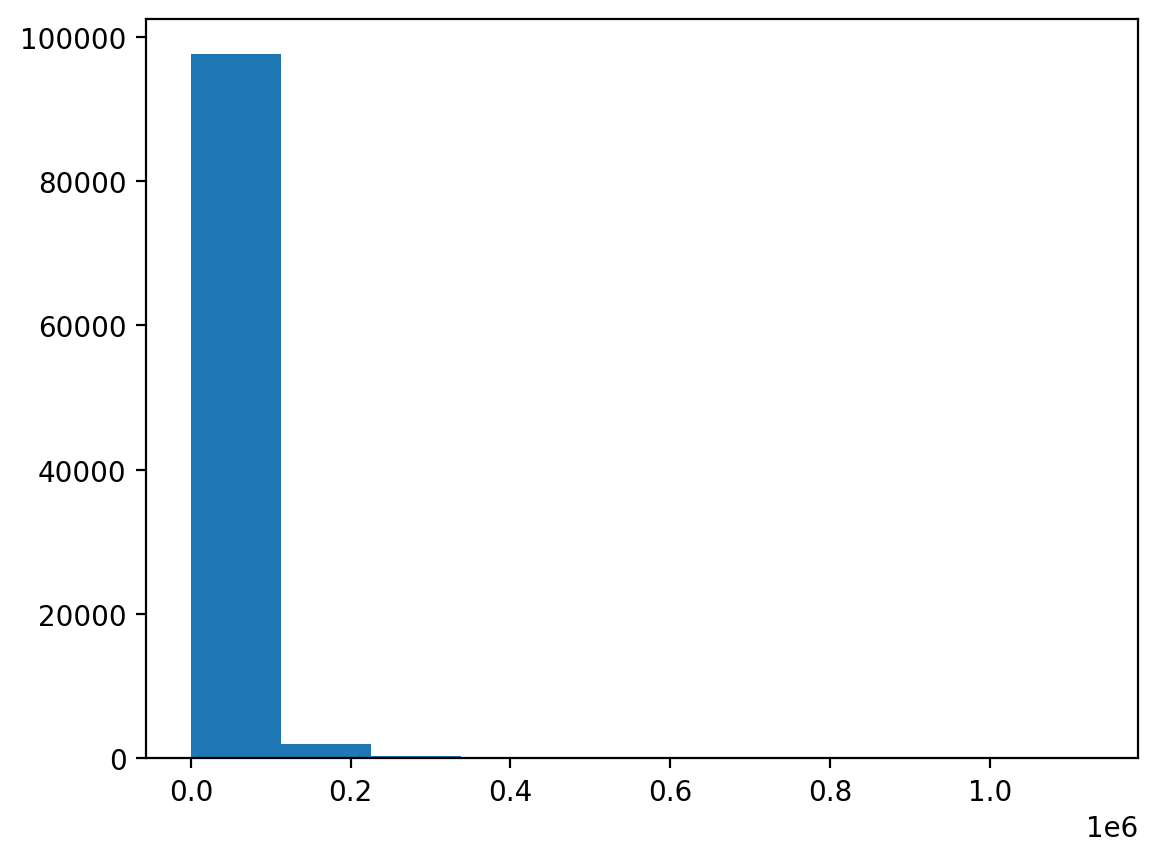

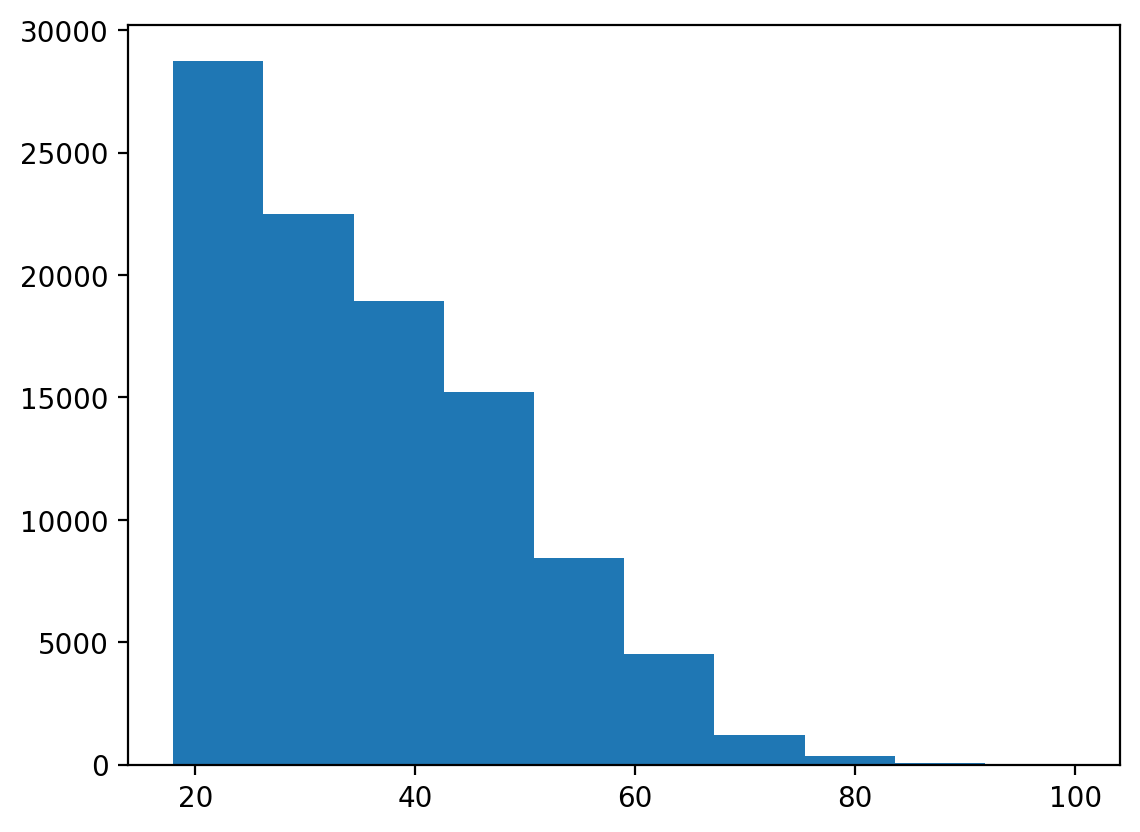

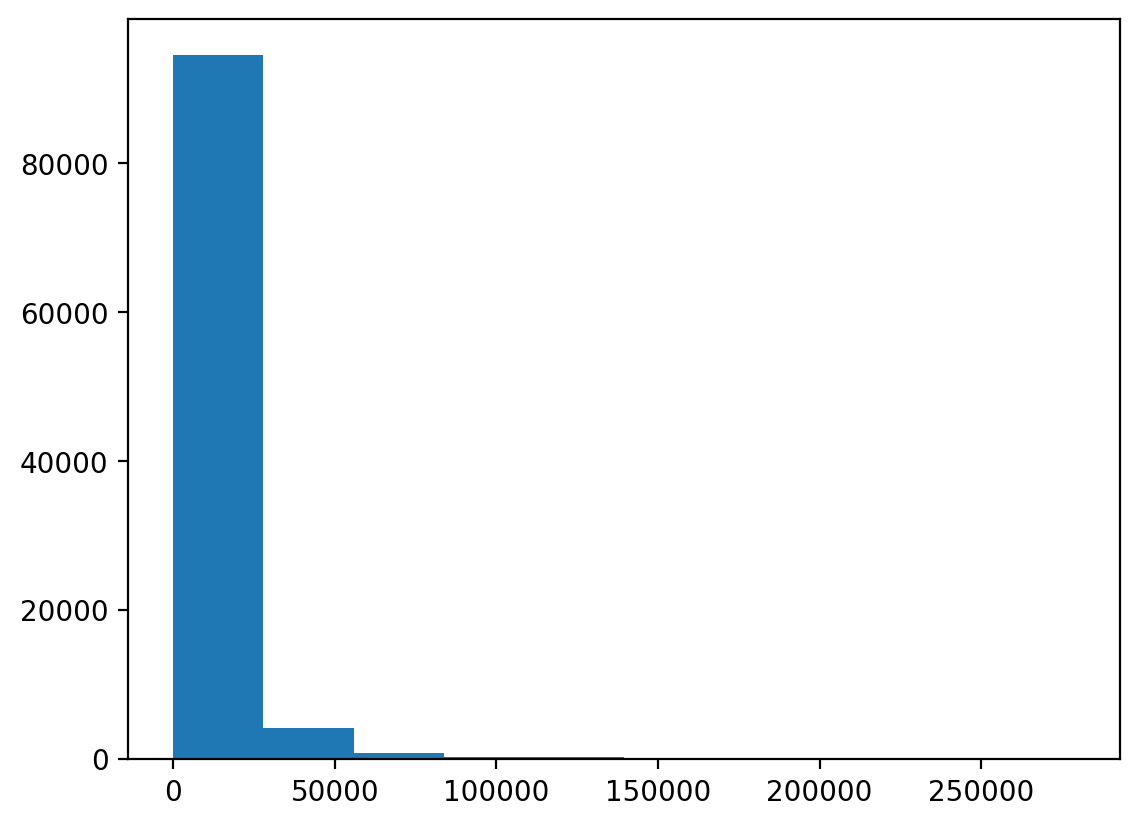

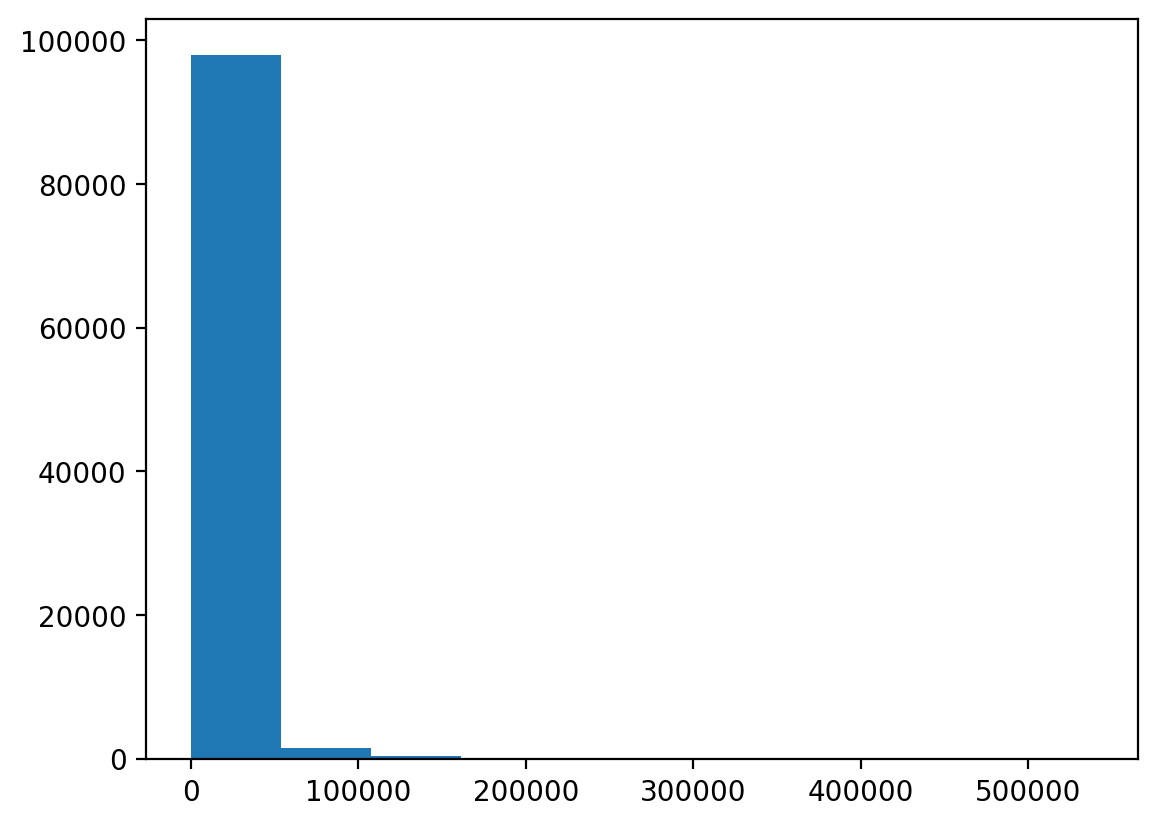

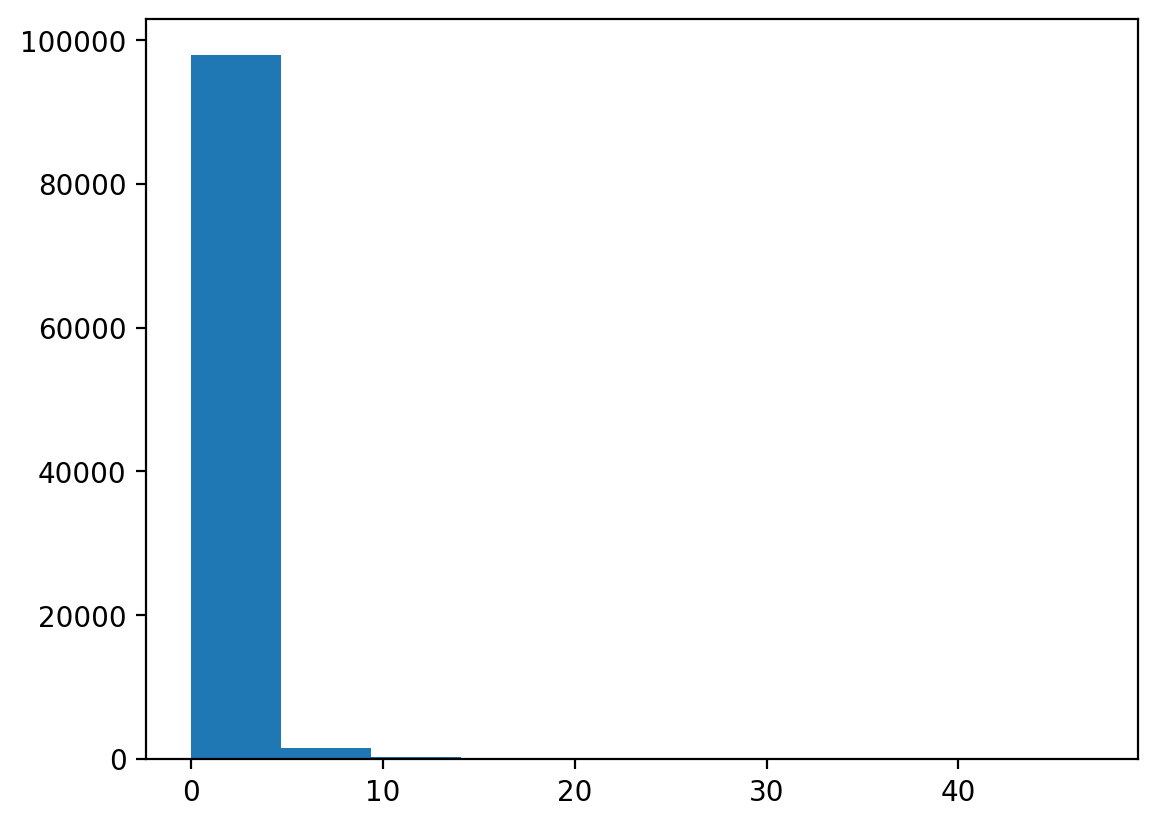

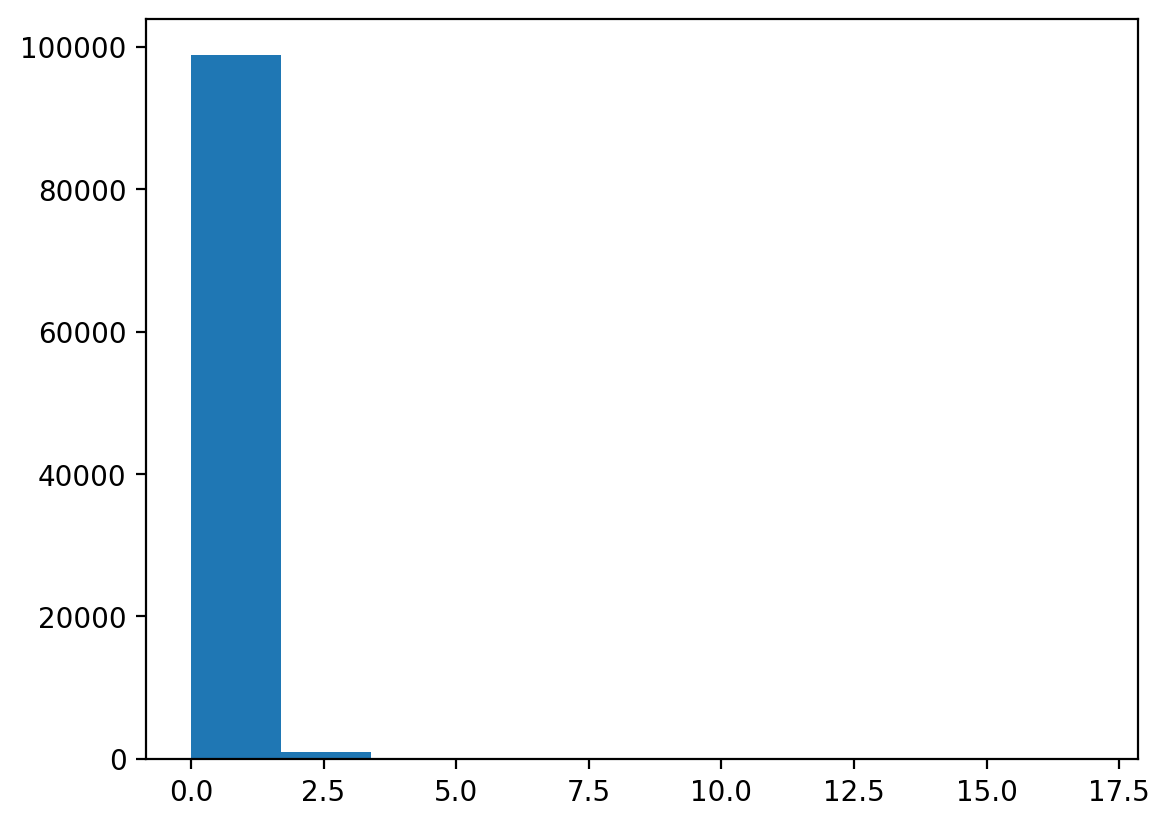

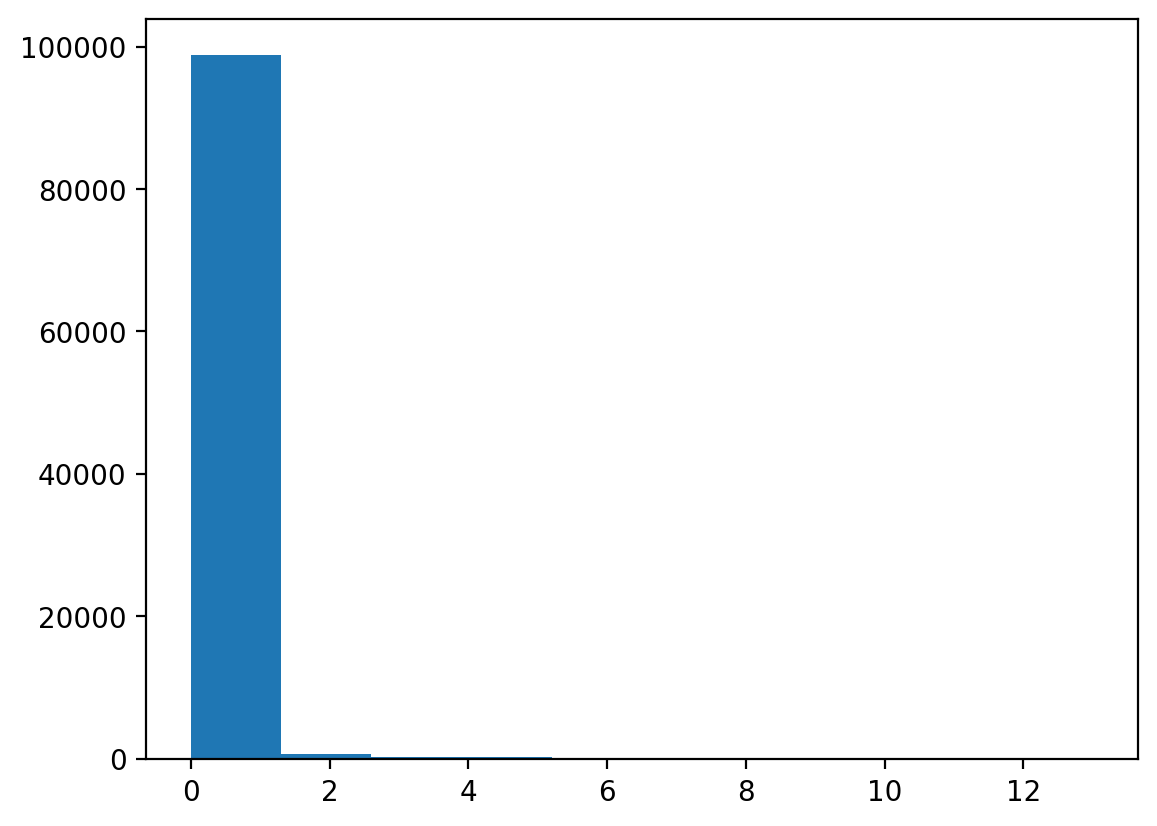

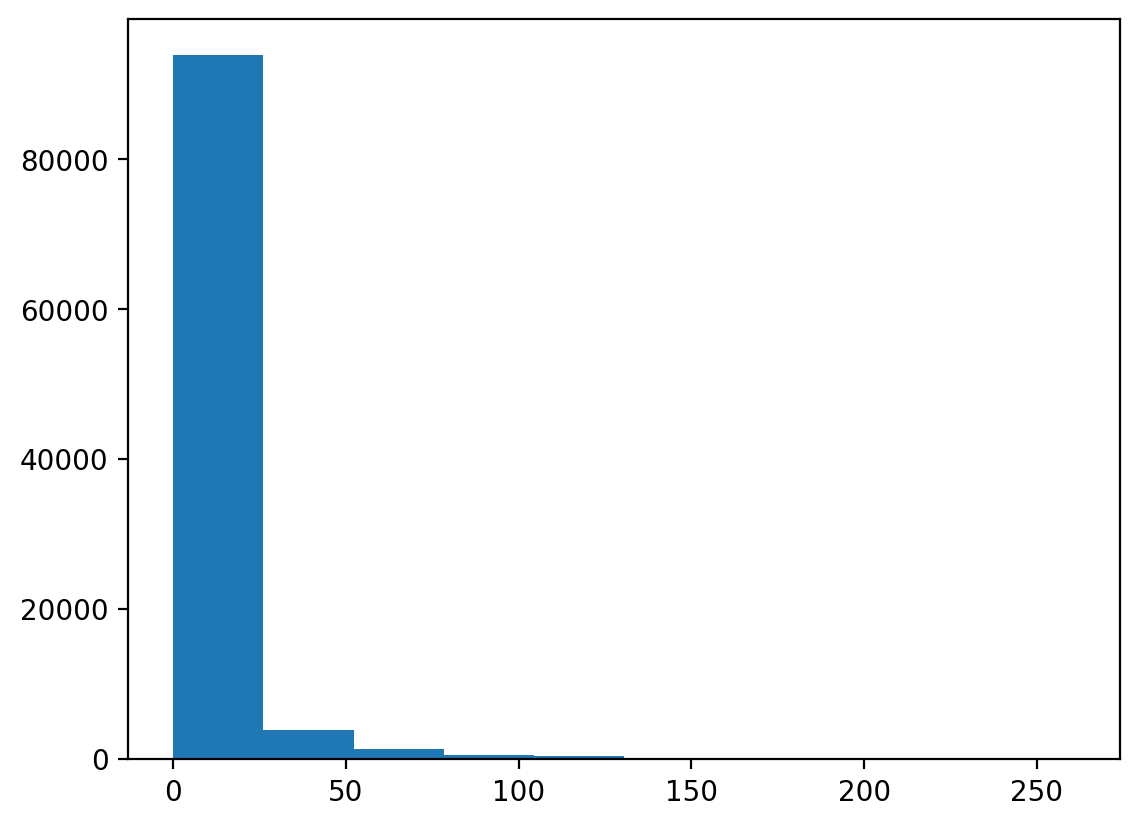

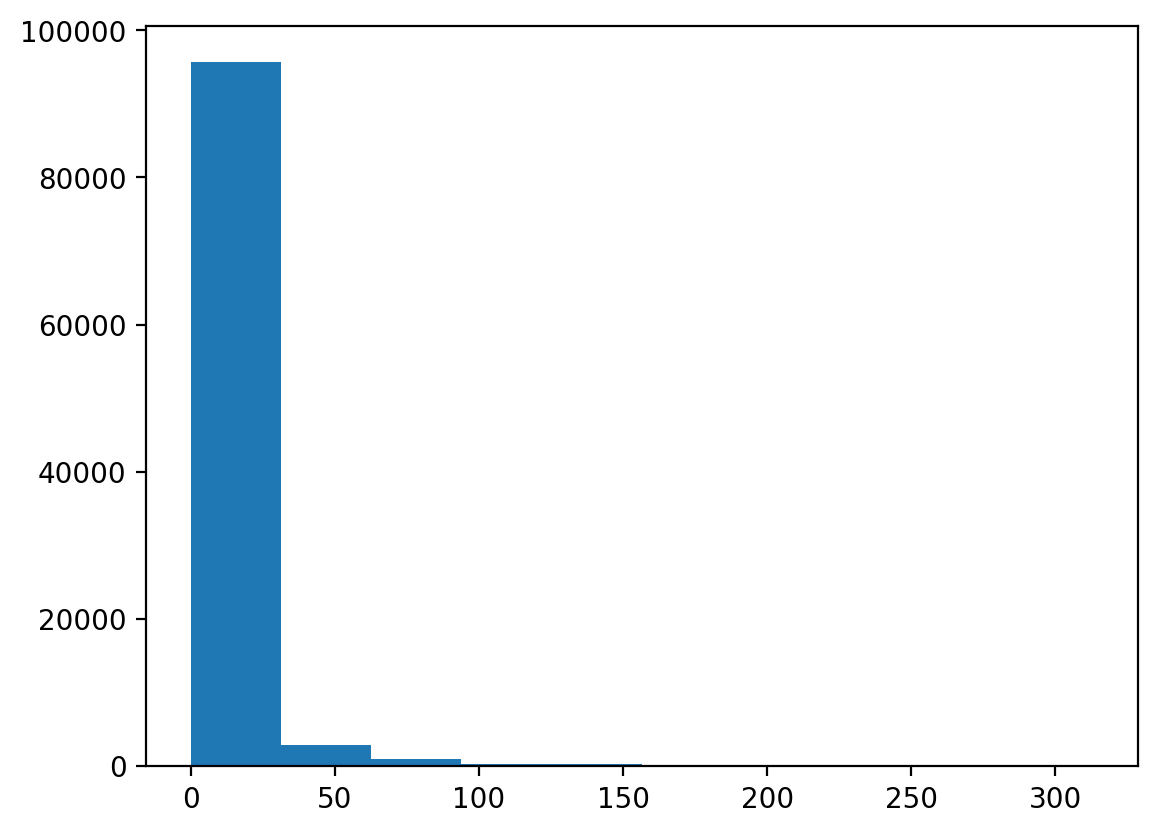

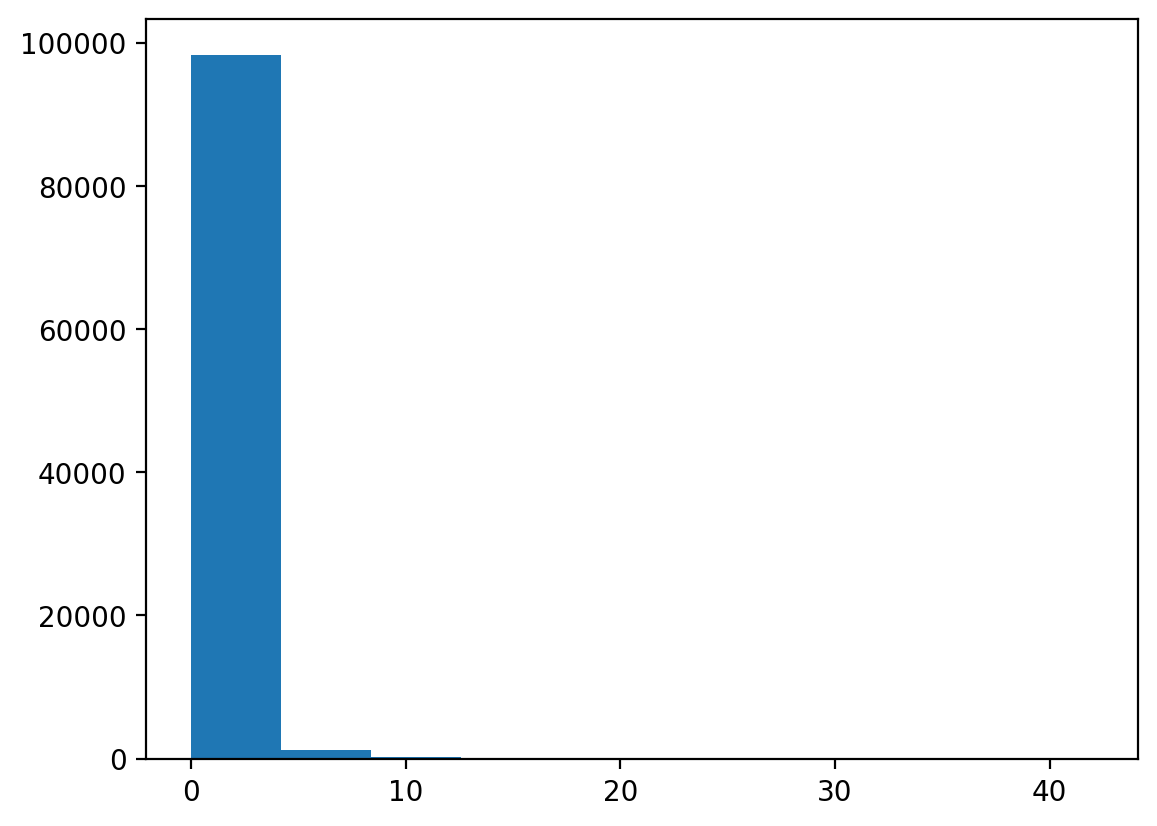

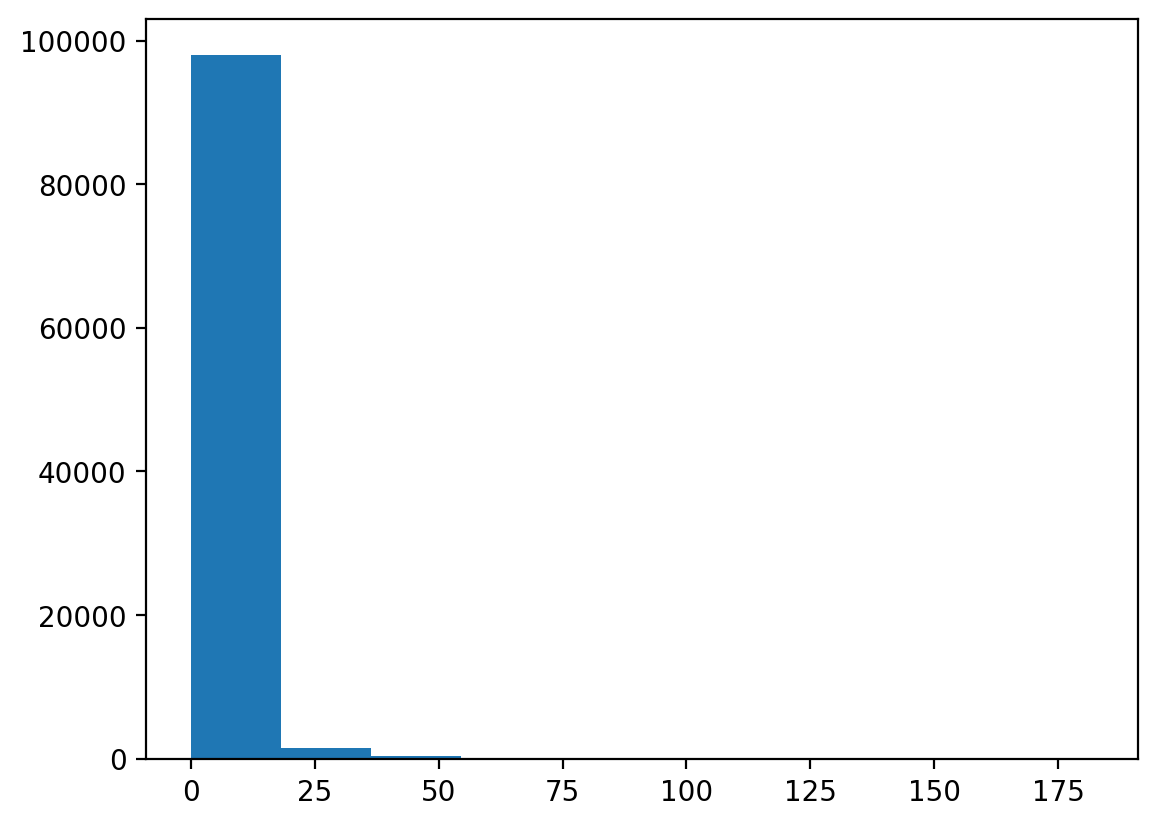

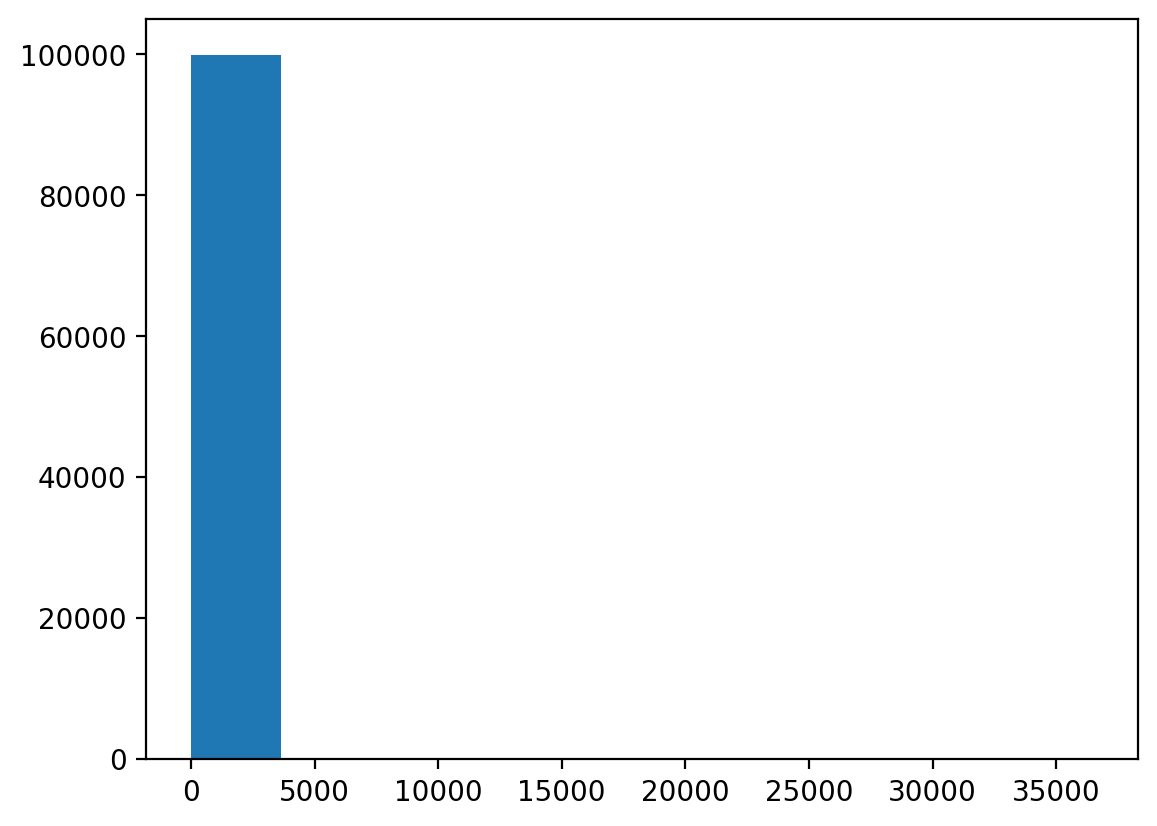

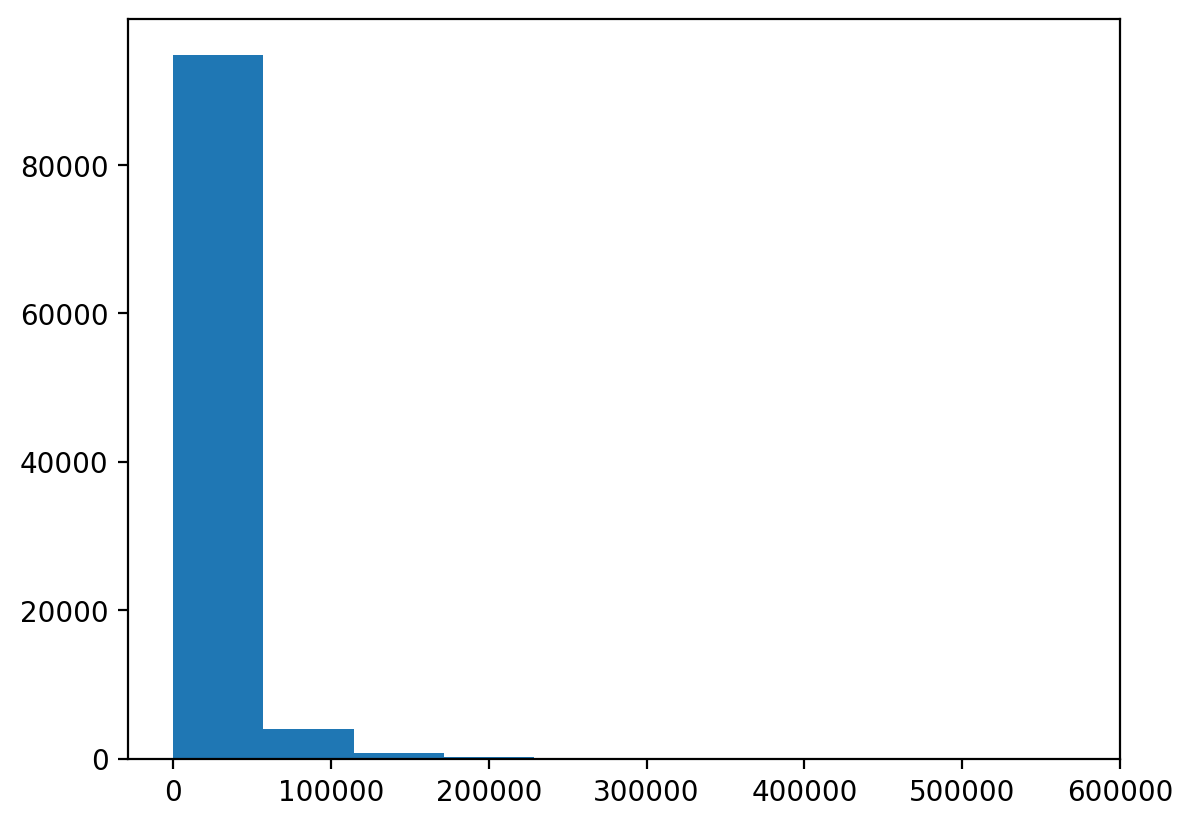

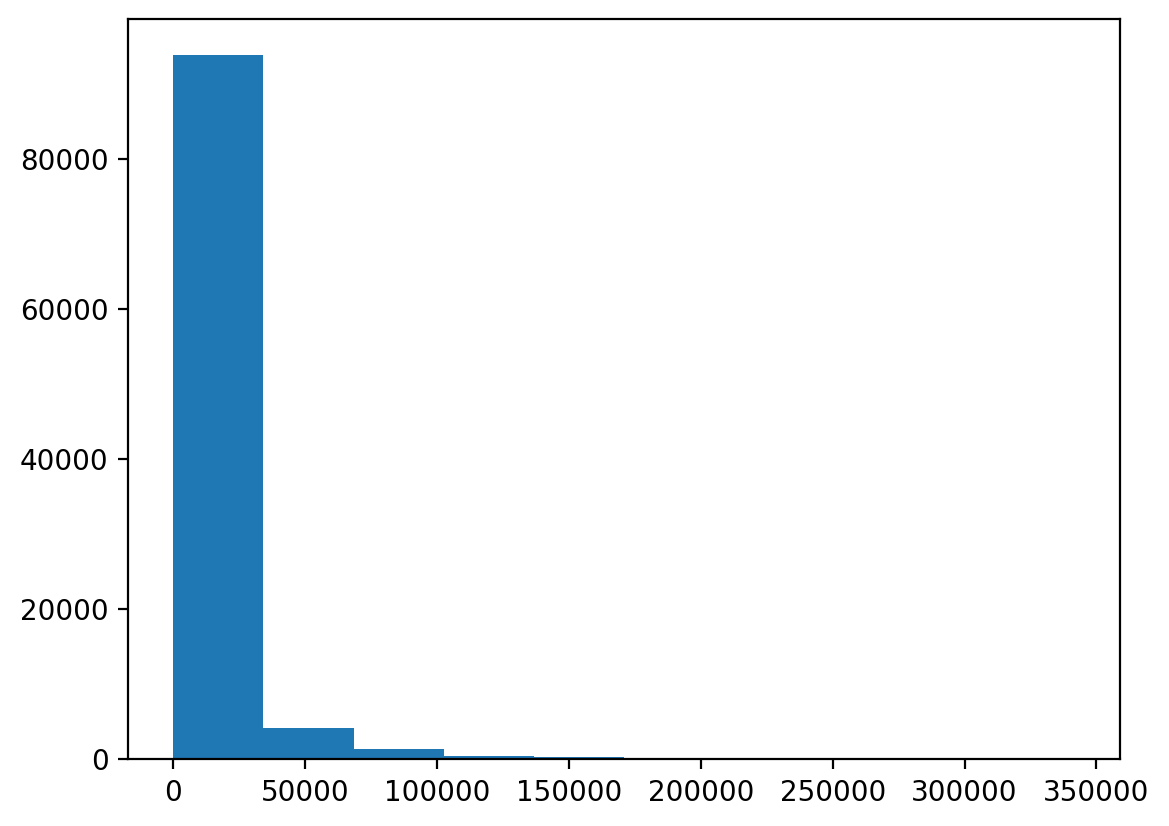

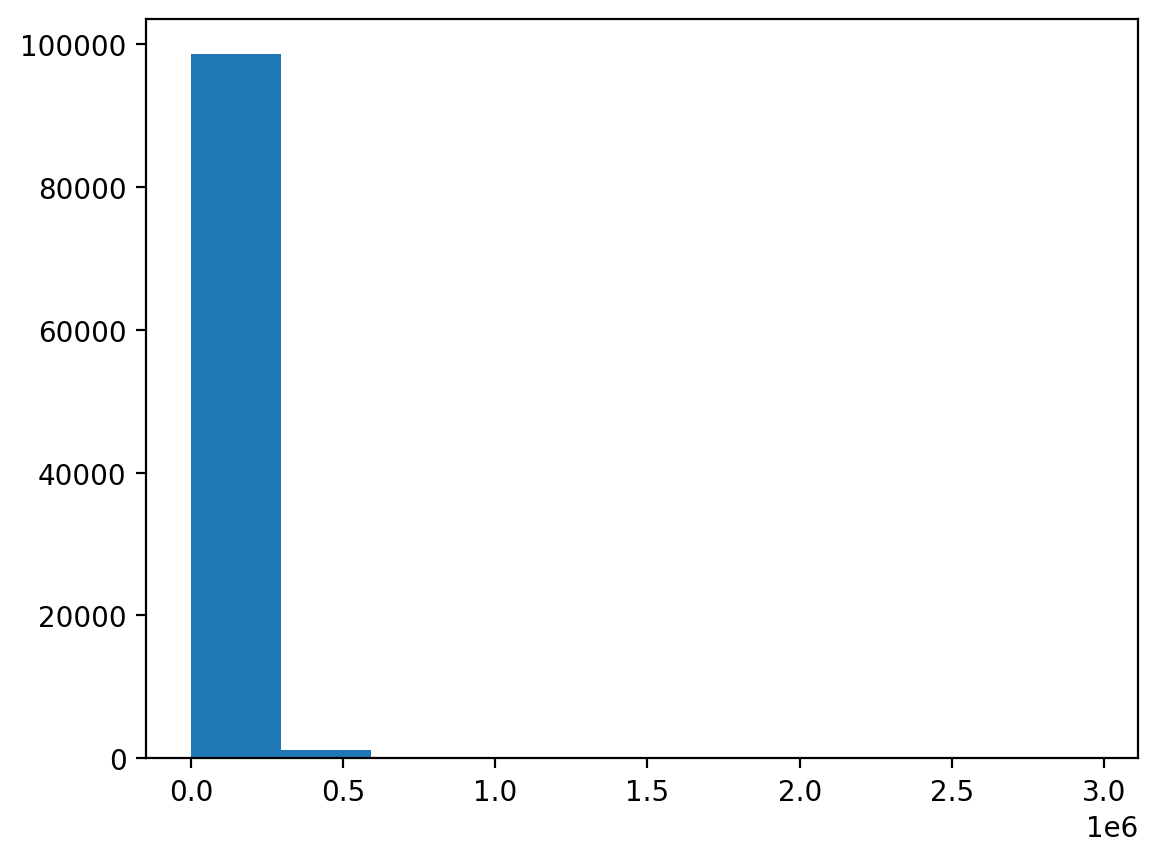

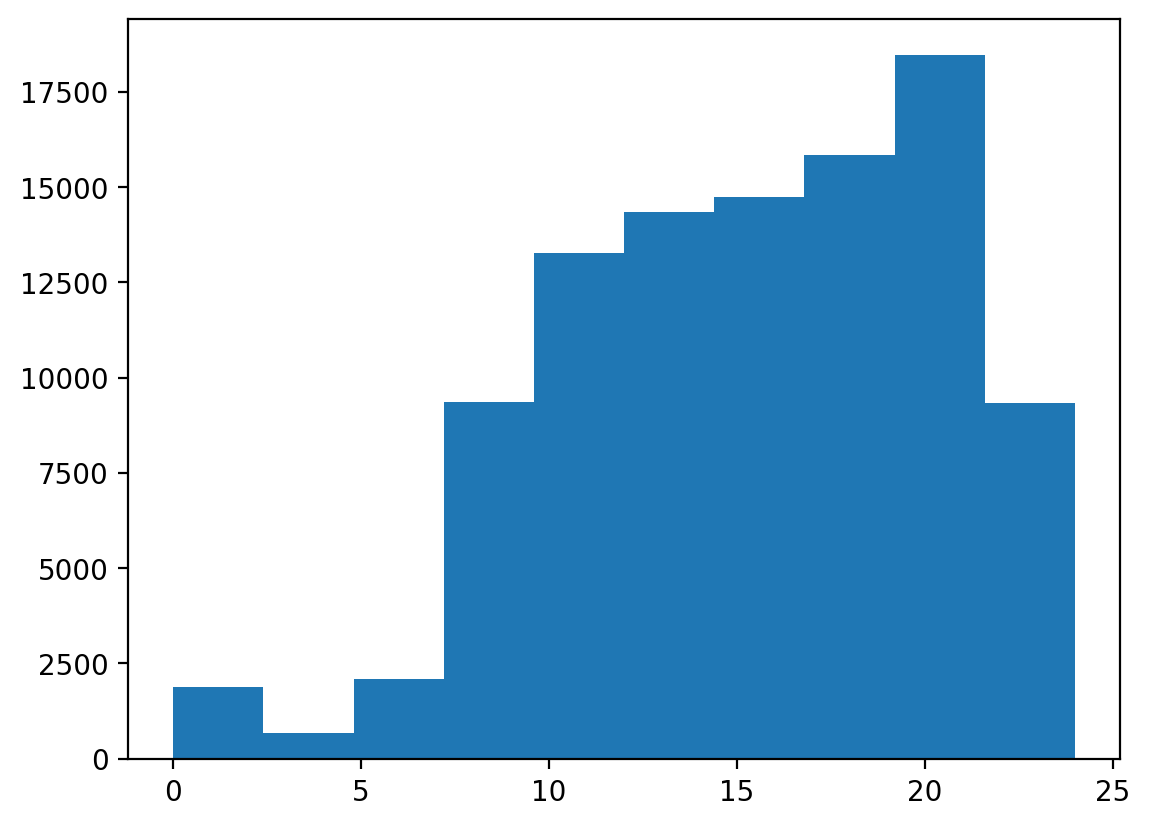

In [117]:
for col in data.select_dtypes("number").columns:
    plt.hist(data[col])
    plt.show()

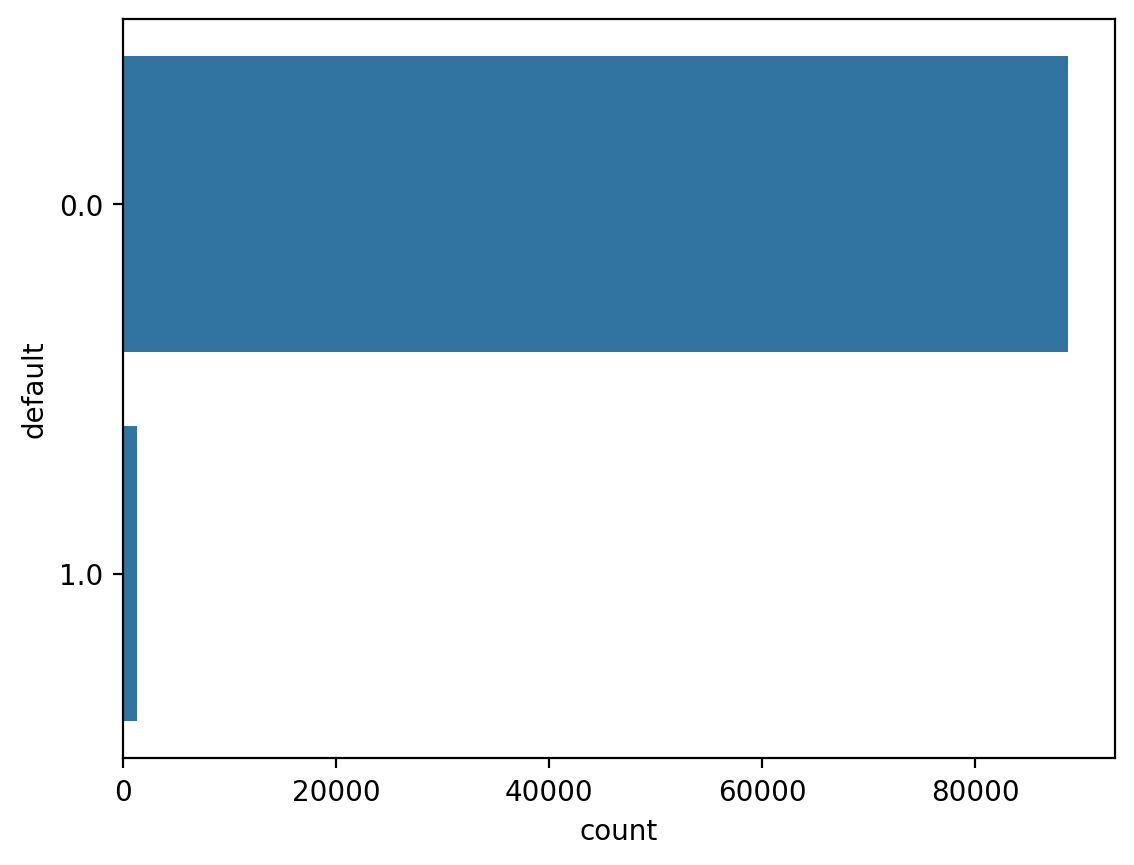

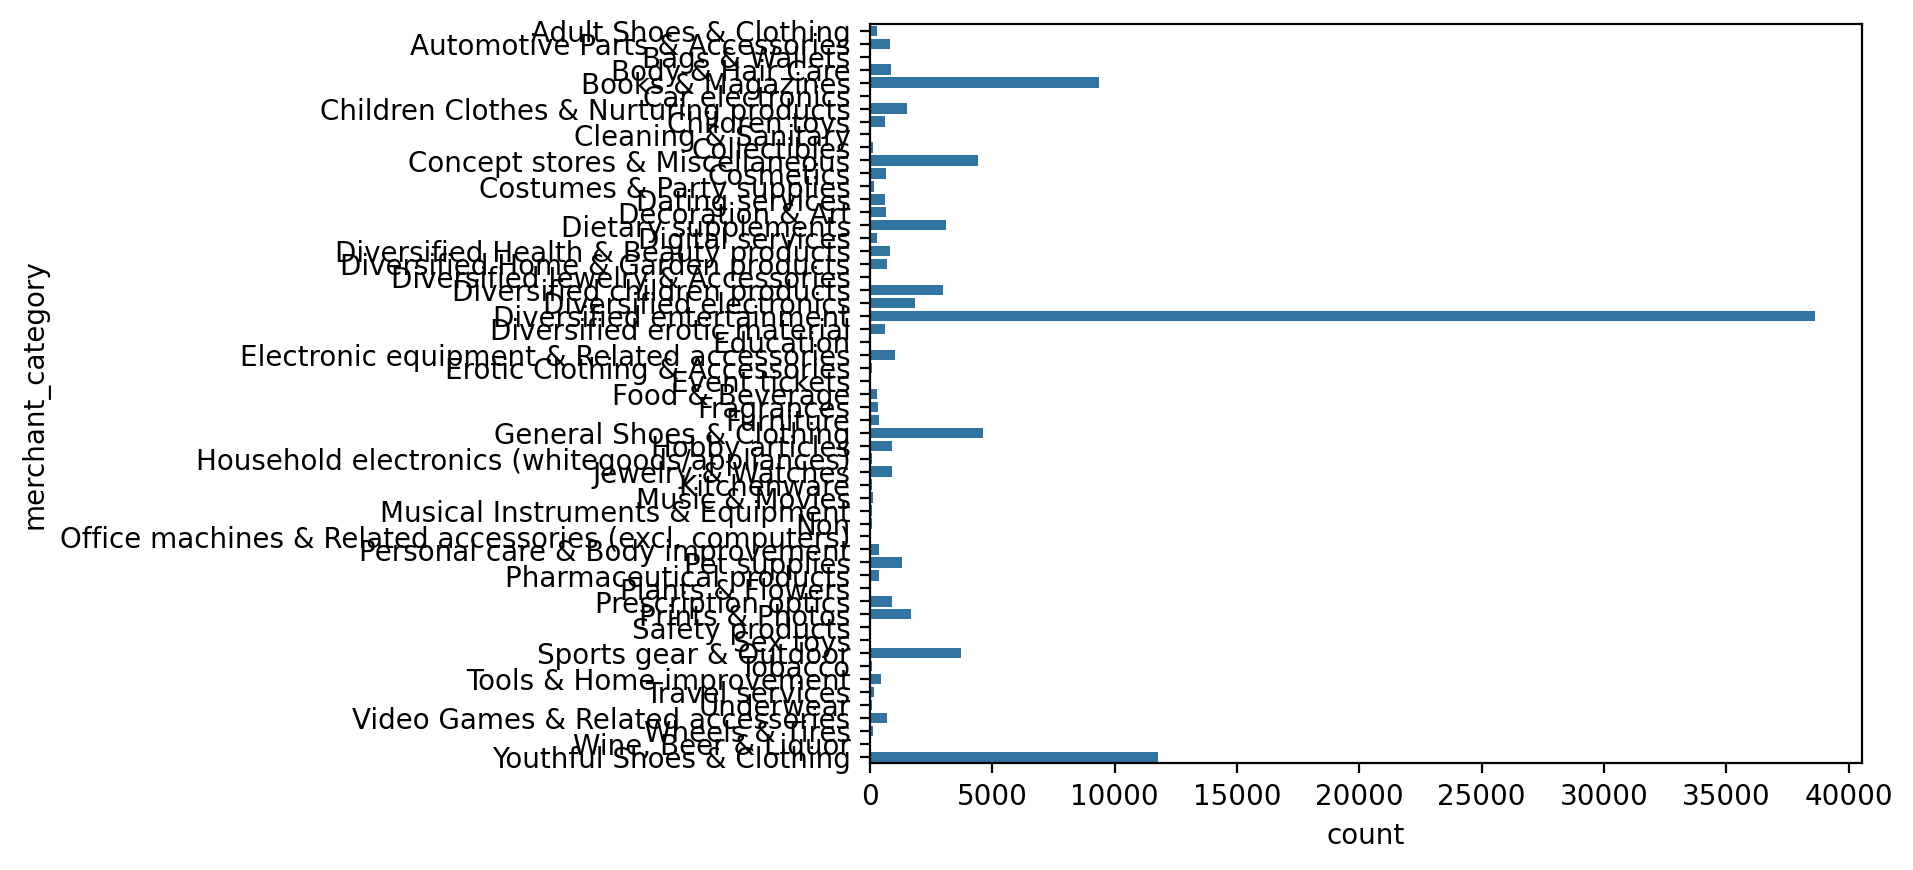

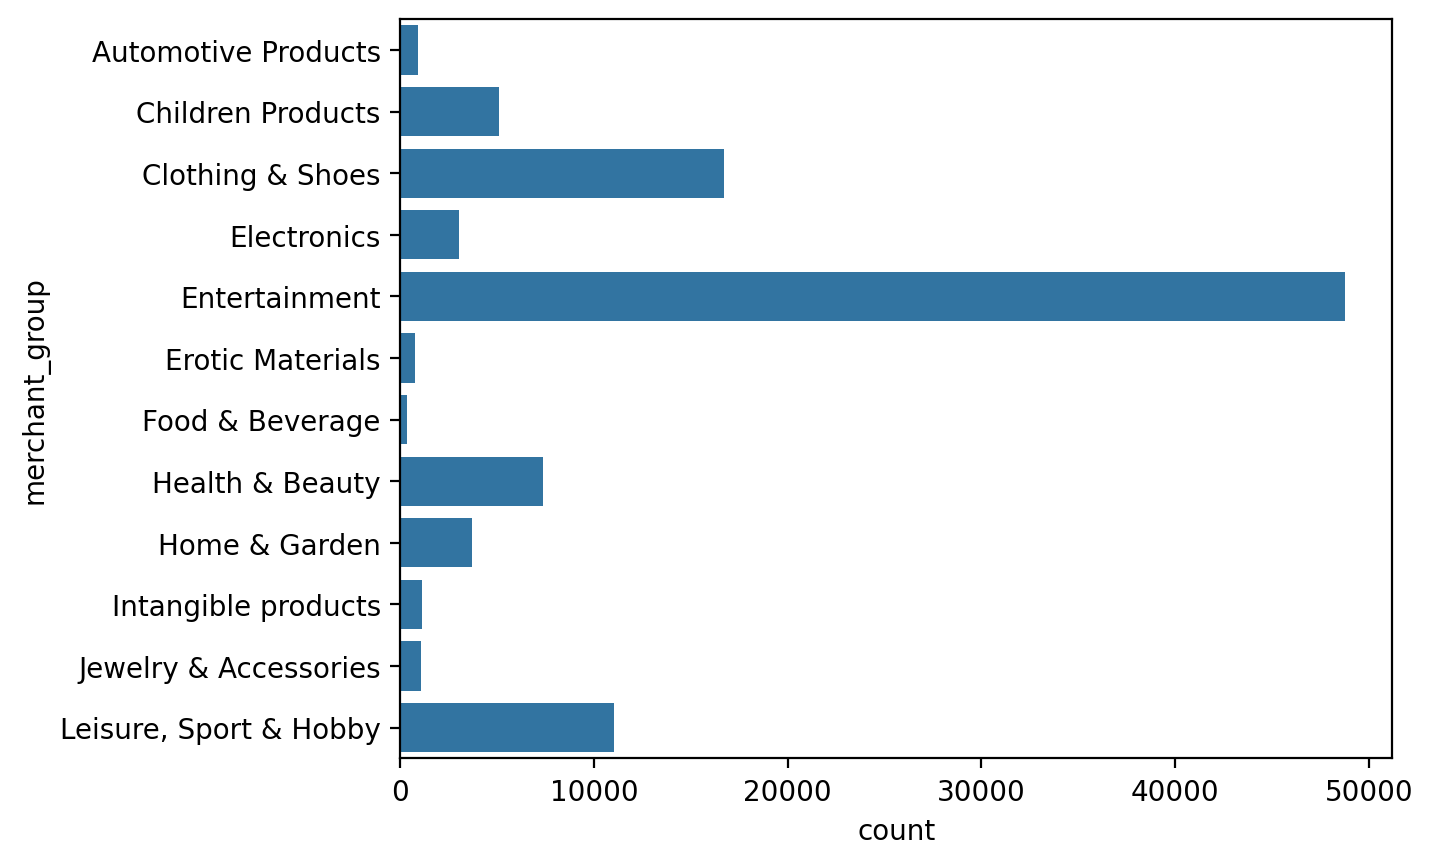

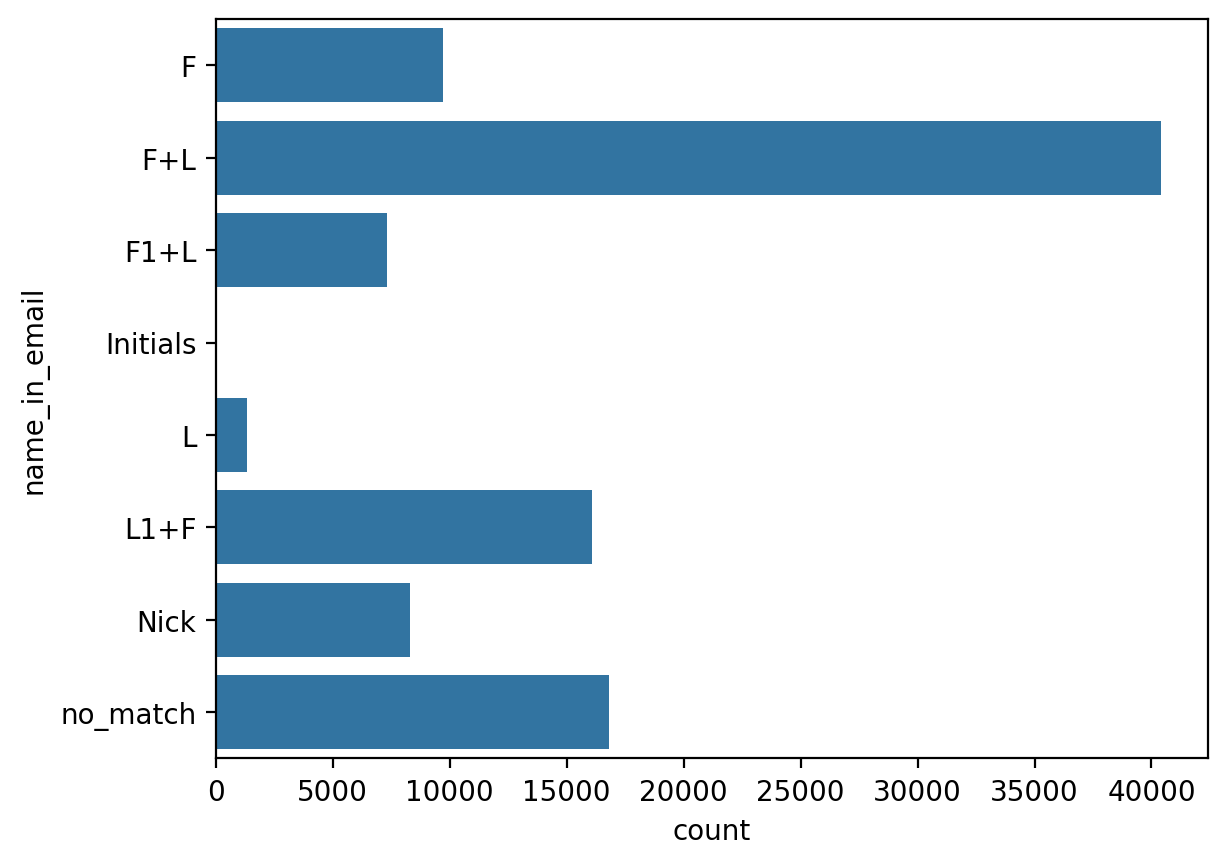

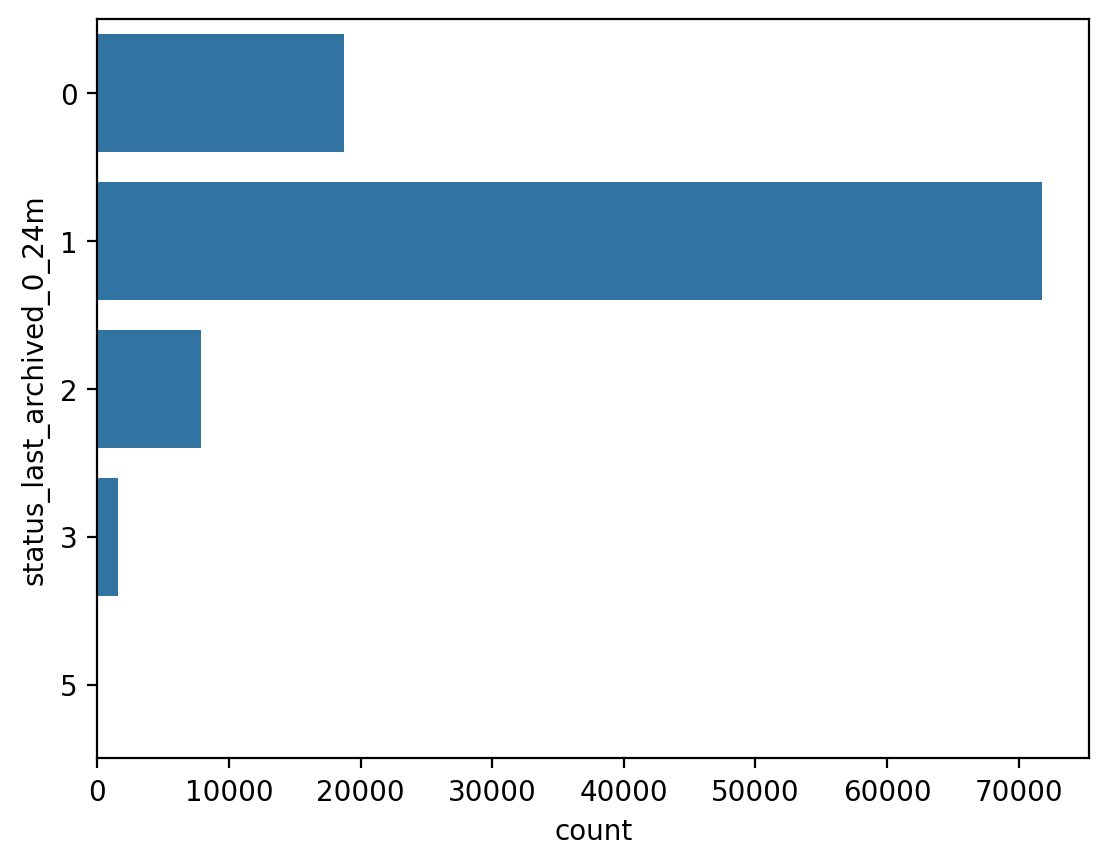

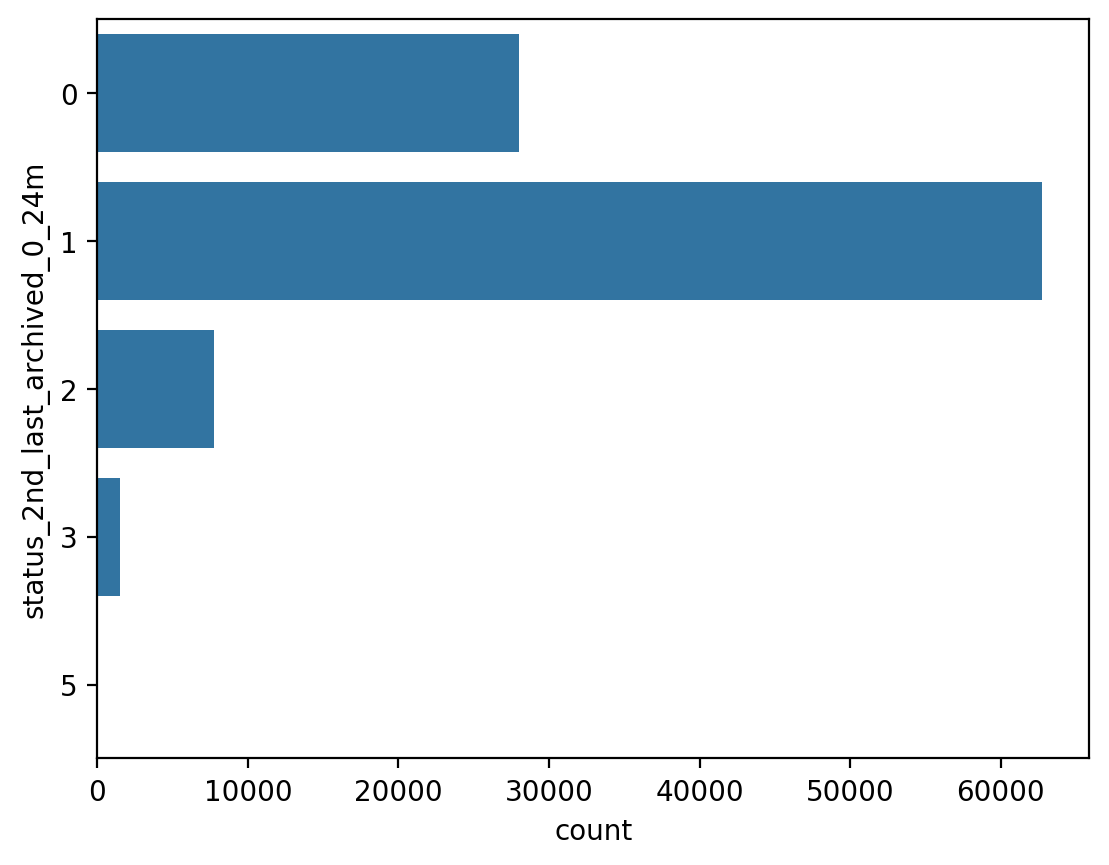

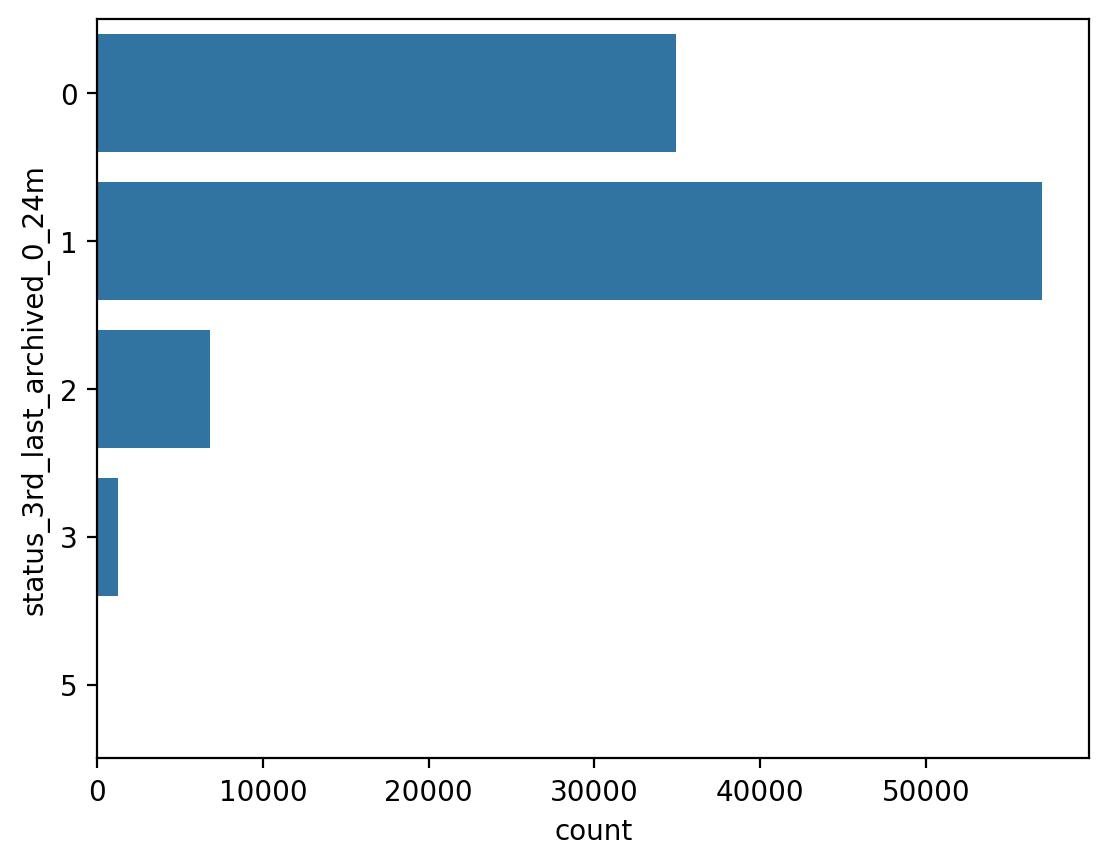

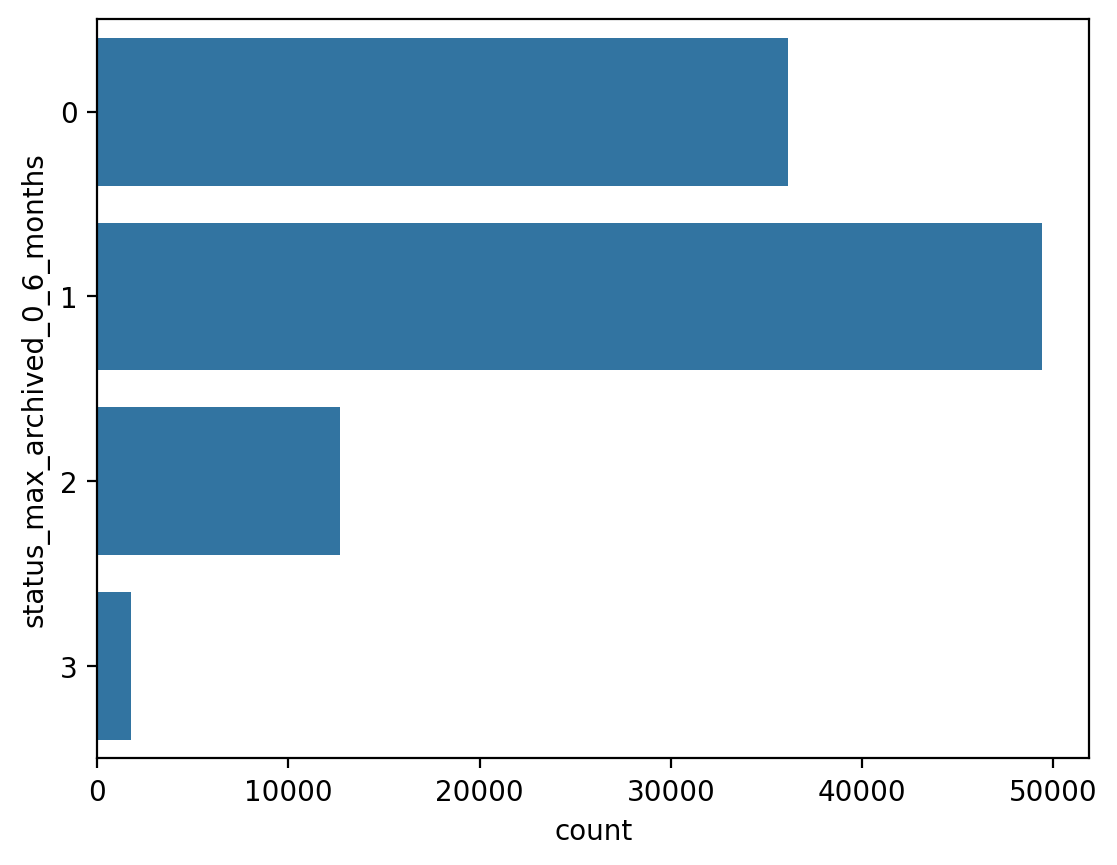

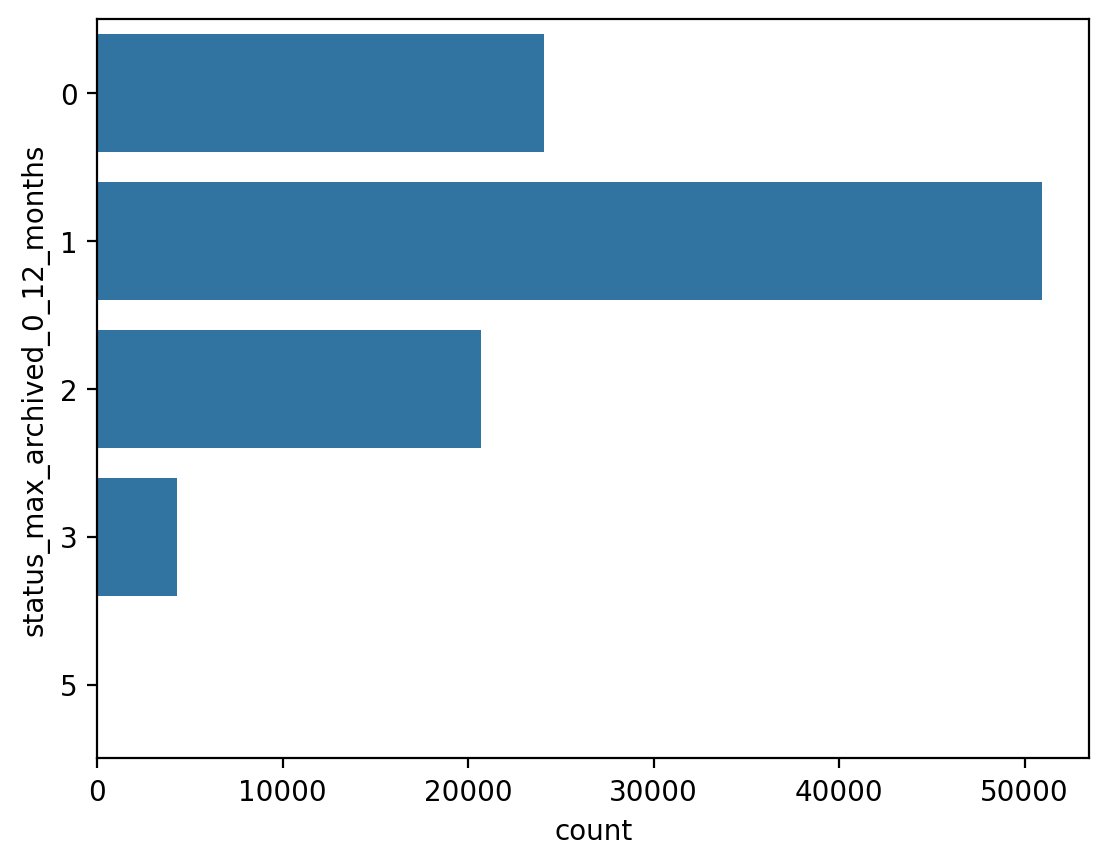

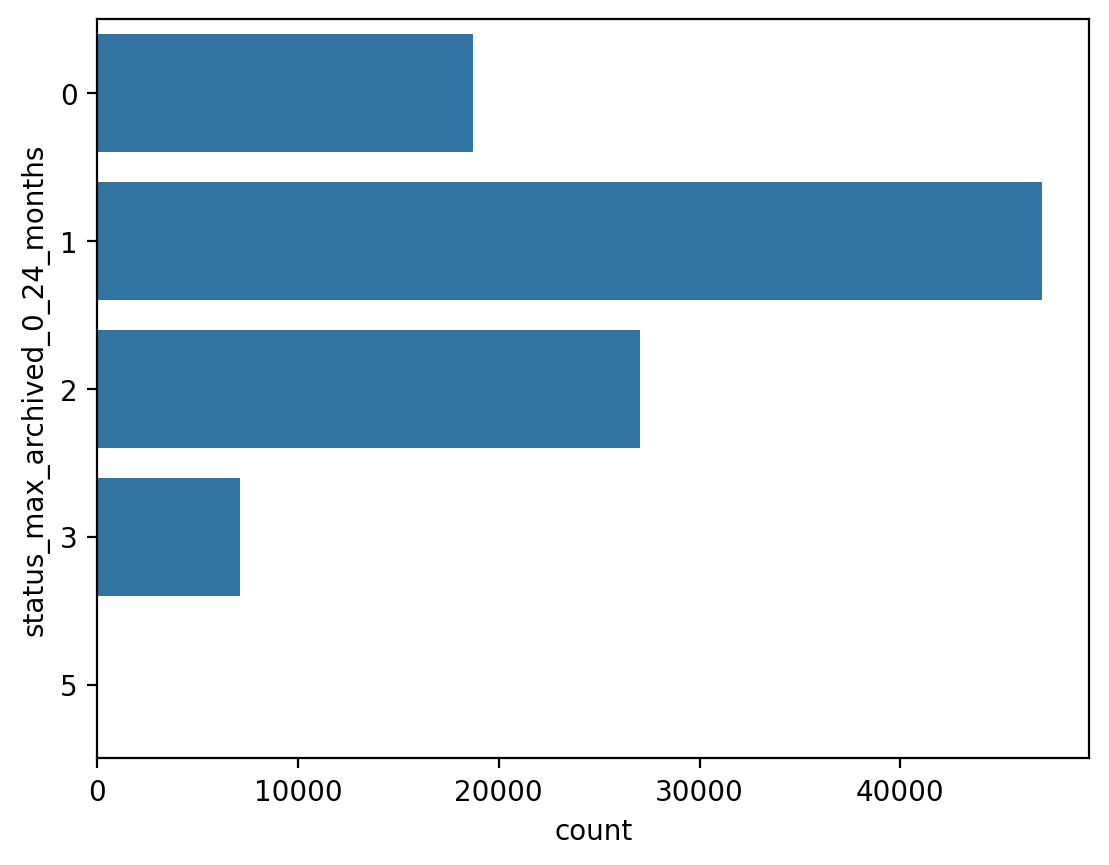

In [119]:
import seaborn as sns
for col in data.select_dtypes("category", "bool").columns:
    sns.countplot(data[col])
    plt.show()

In [144]:
data.dtypes

uuid                               string[python]
default                                  category
account_amount_added_12_24m                 int64
age                                         int64
merchant_category                        category
merchant_group                           category
has_paid                                     bool
max_paid_inv_0_12m                        float64
max_paid_inv_0_24m                        float64
name_in_email                            category
num_active_inv                              int64
num_arch_dc_0_12m                           int64
num_arch_dc_12_24m                          int64
num_arch_ok_0_12m                           int64
num_arch_ok_12_24m                          int64
num_arch_rem_0_12m                          int64
num_unpaid_bills                            int64
status_last_archived_0_24m               category
status_2nd_last_archived_0_24m           category
status_3rd_last_archived_0_24m           category


In [146]:
isinstance(data["account_amount_added_12_24m"].dtype, pd.Int64Dtype)

False